# Quantitative comparisons and statistical visualizations

In [2]:
import pandas as pd
medals = pd.read_csv("C:\\Users\\yazan\\Desktop\\DS\\5-Introduction to Data Visualization with Matplotlib\\Datasets\\medals_by_country_2016.csv", index_col=0)
print(medals.head())

               Bronze  Gold  Silver
United States      67   137      52
Germany            67    47      43
Great Britain      26    64      55
Russia             35    50      28
China              35    44      30


# 1. Quantitative comparisons: bar-charts

<b>1.1 Bar chart</b>

Bar charts visualize data that is organized according to categories as a series of bars, where the height of each bar represents the values of the data in this category.

For example, in this exercise, you will visualize the number of gold medals won by each country in the provided medals DataFrame. The DataFrame contains the countries as the index, and a column called "Gold" that contains the number of gold medals won by each country, according to their rows.

C:\Users\yazan\AppData\Local\Temp\ipykernel_12872\3910427061.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


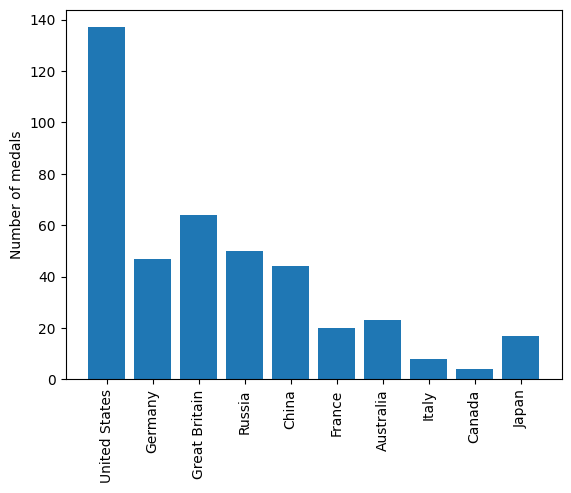

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals['Gold'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel("Number of medals")

plt.show()